Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


C:\ProgramData\Anaconda3\envs\tensorflow-gpu\lib\site-packages\matplotlib\figure.py:1742: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


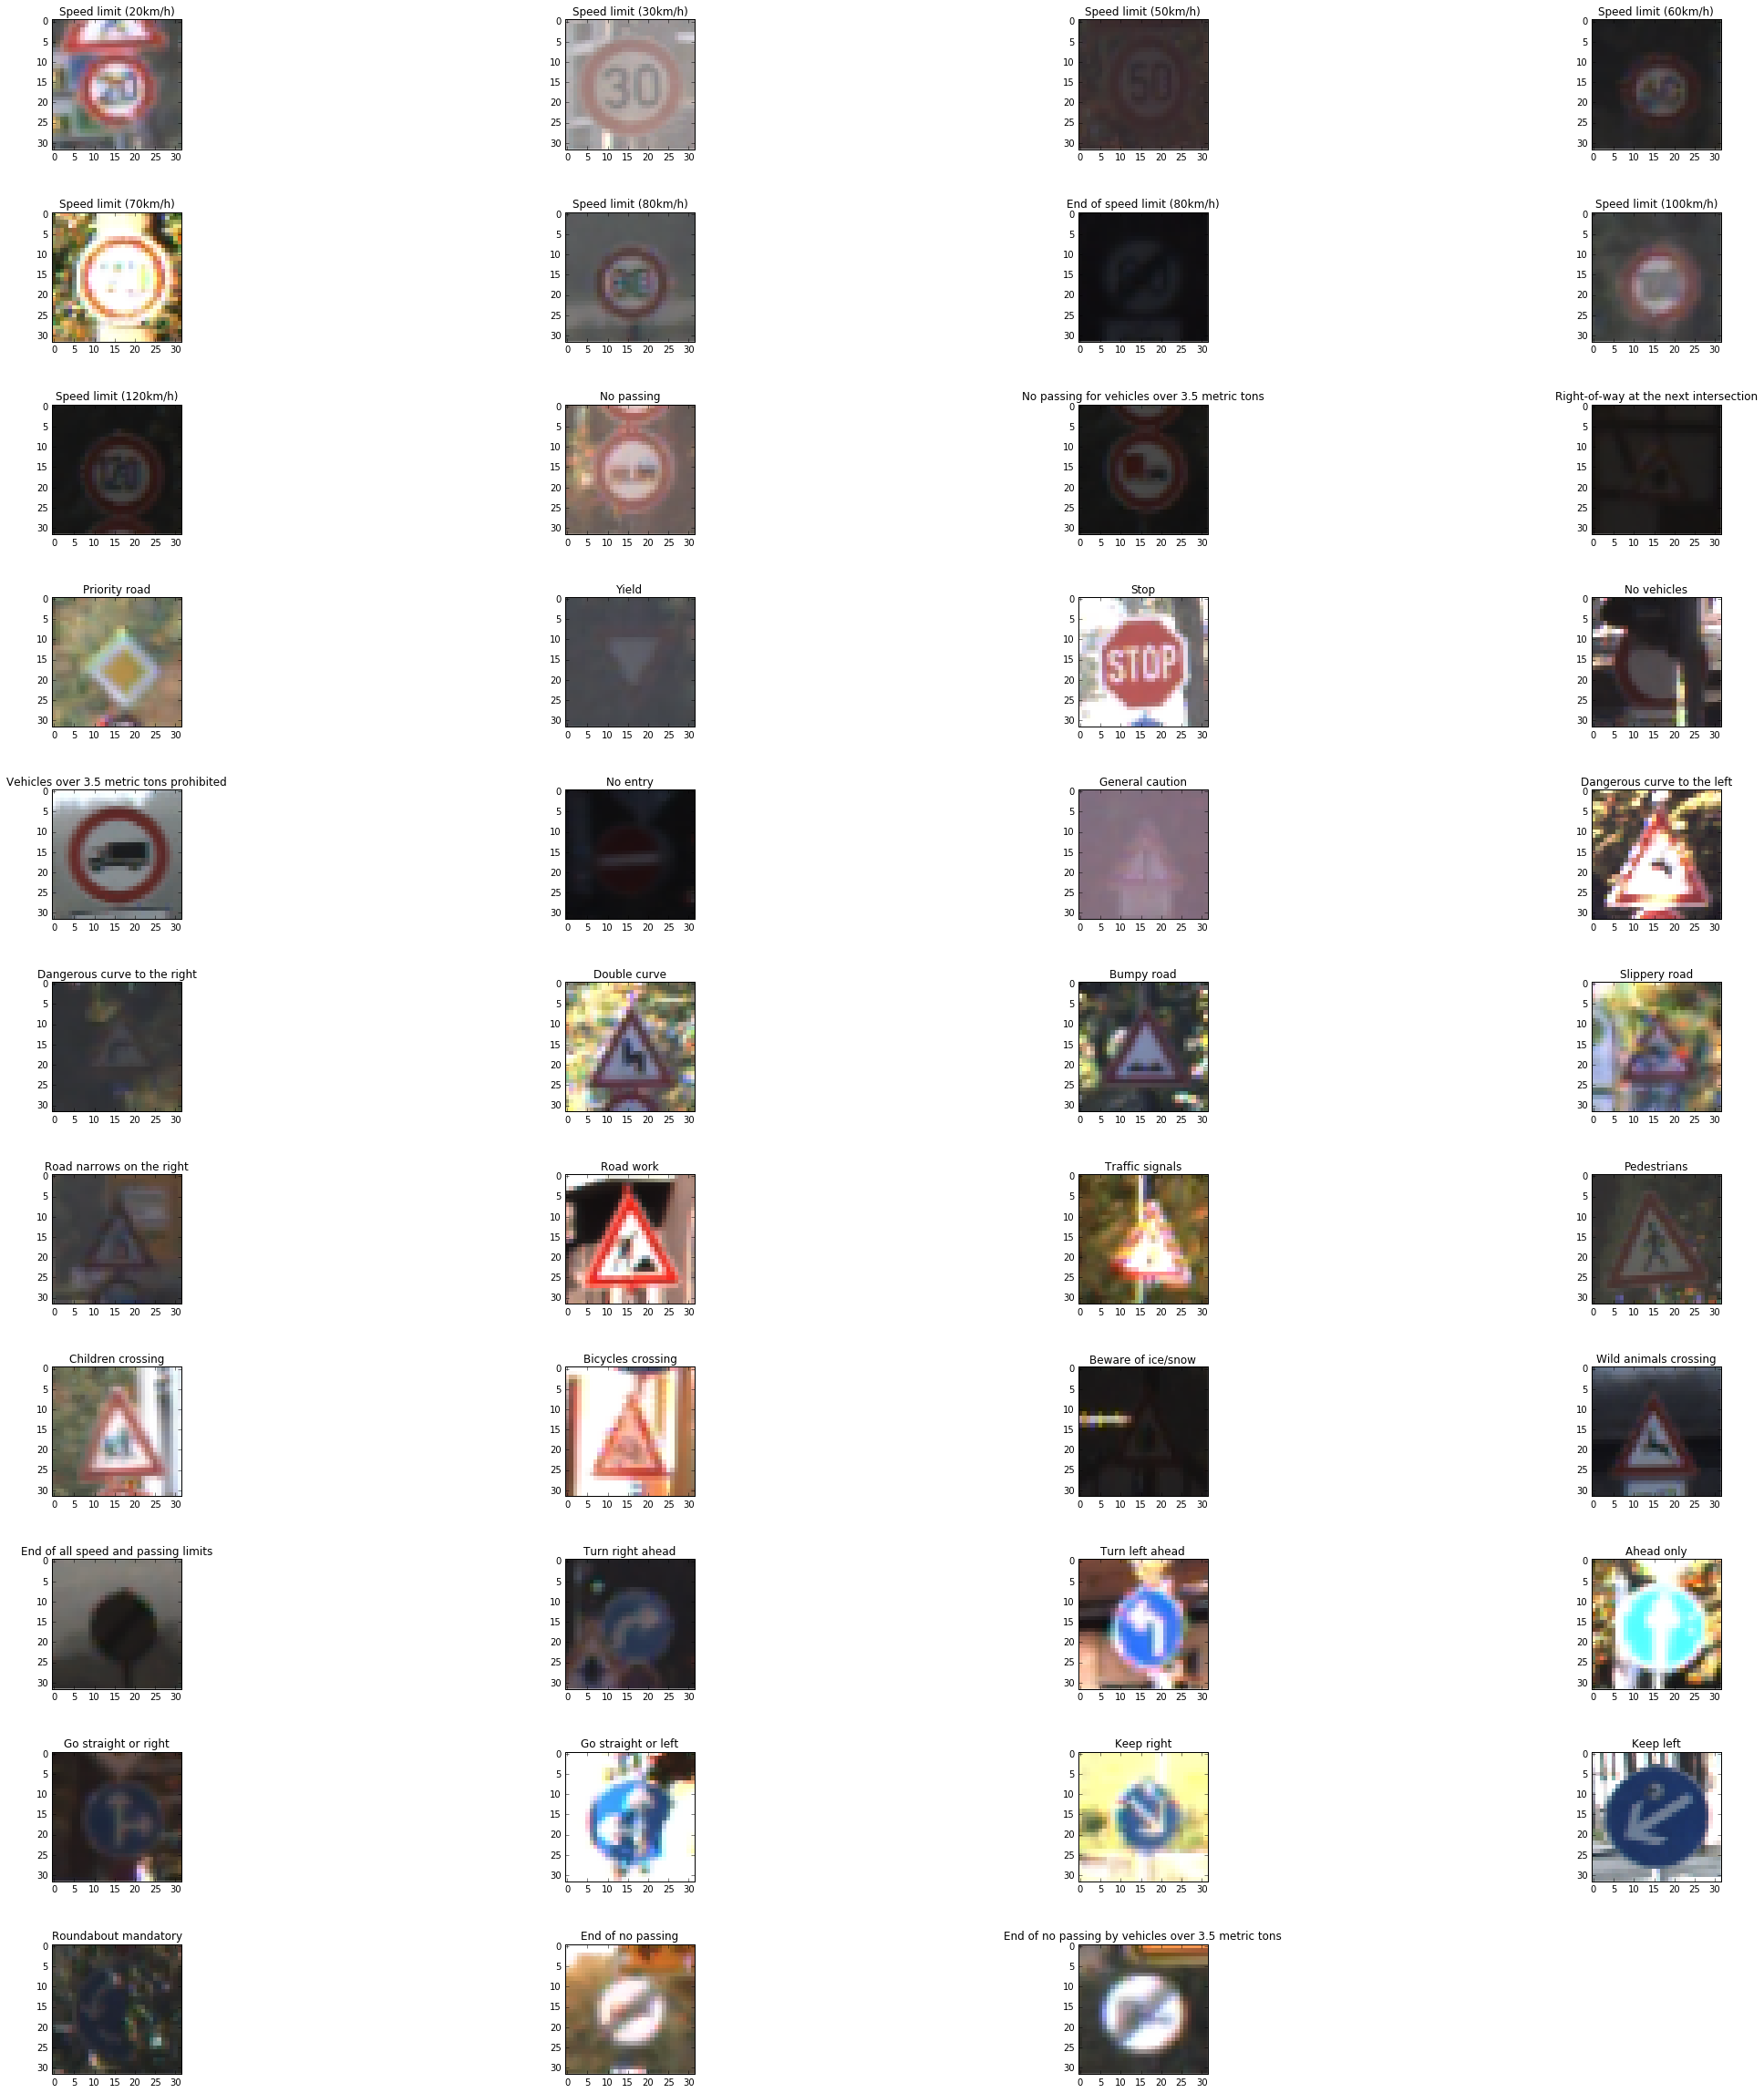

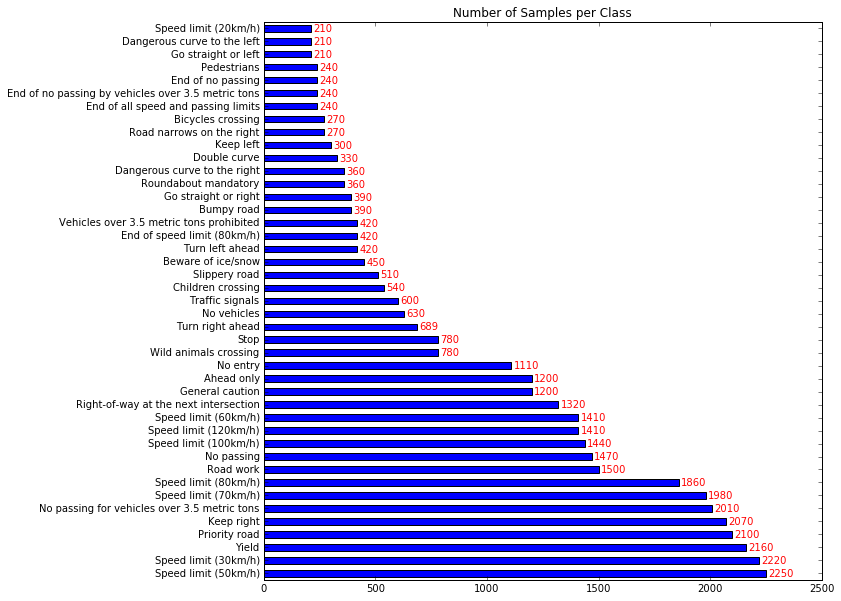

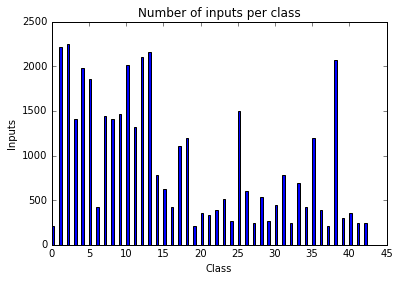

Class:  0


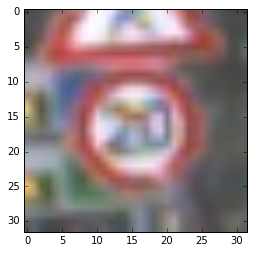

Class:  1


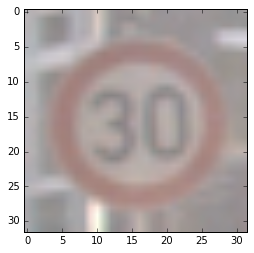

Class:  2


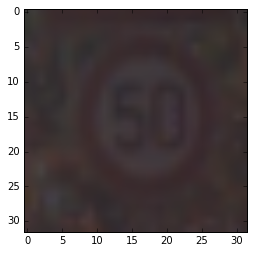

Class:  3


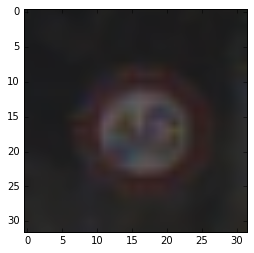

Class:  4


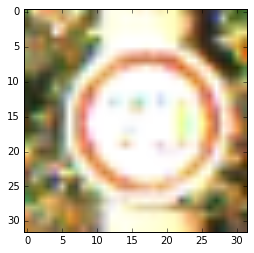

Class:  5


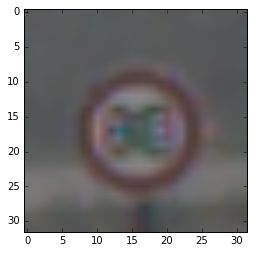

Class:  6


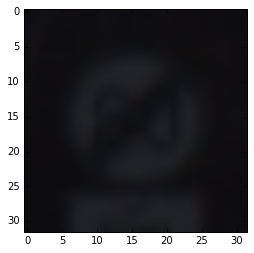

Class:  7


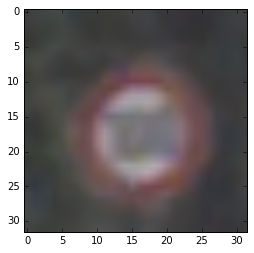

Class:  8


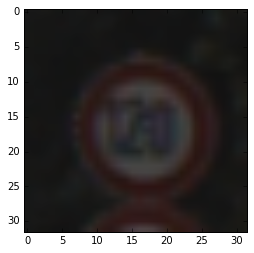

Class:  9


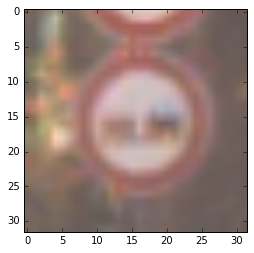

Class:  10


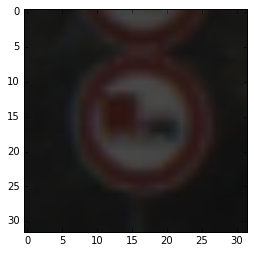

Class:  11


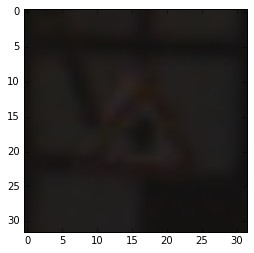

Class:  12


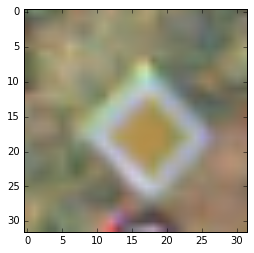

Class:  13


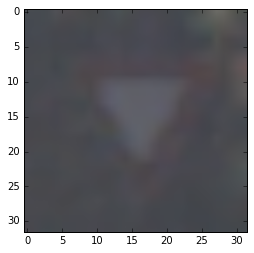

Class:  14


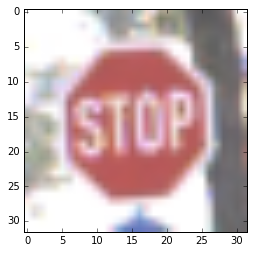

Class:  15


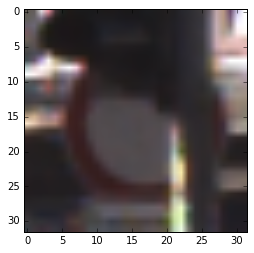

Class:  16


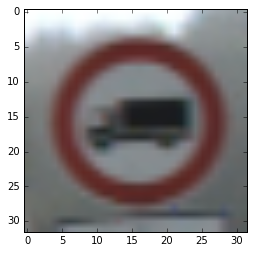

Class:  17


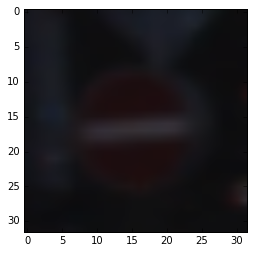

Class:  18


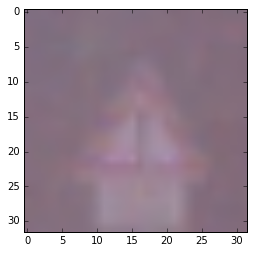

Class:  19


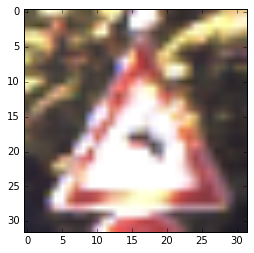

Class:  20


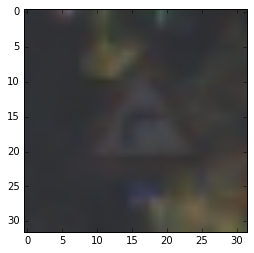

Class:  21


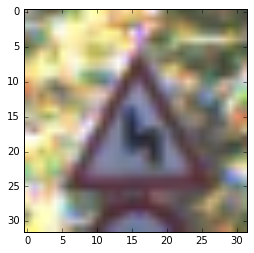

Class:  22


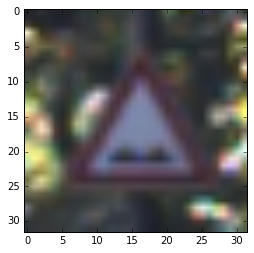

Class:  23


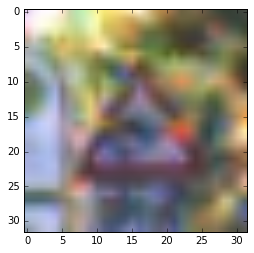

Class:  24


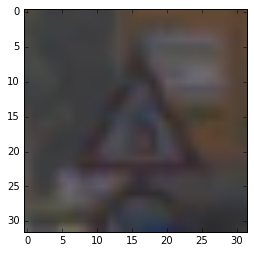

Class:  25


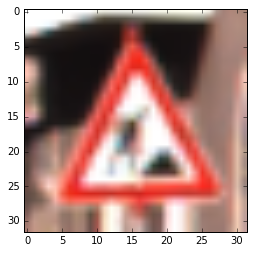

Class:  26


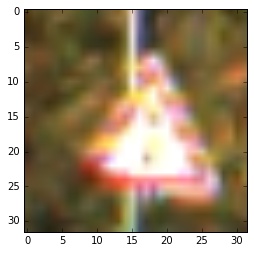

Class:  27


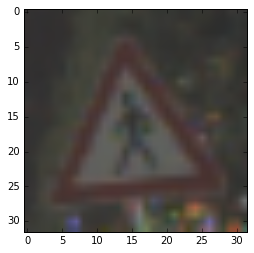

Class:  28


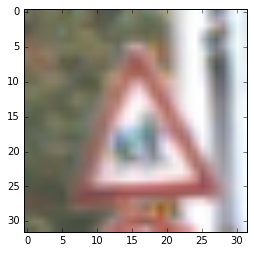

Class:  29


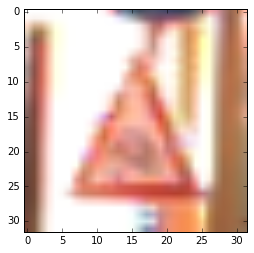

Class:  30


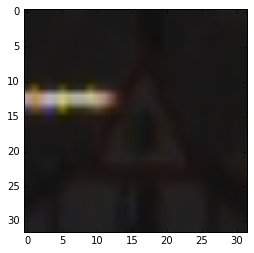

Class:  31


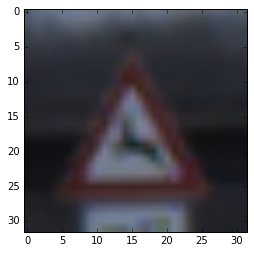

Class:  32


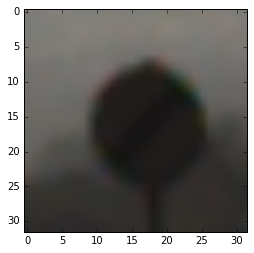

Class:  33


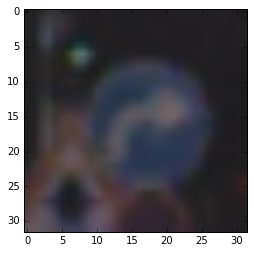

Class:  34


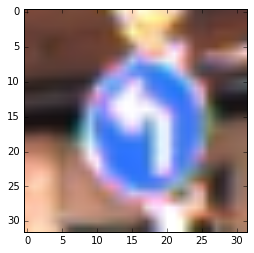

Class:  35


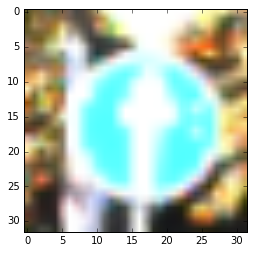

Class:  36


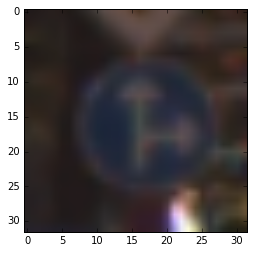

Class:  37


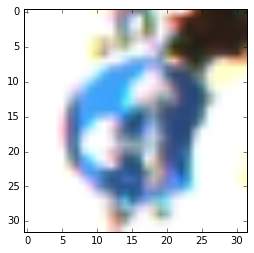

Class:  38


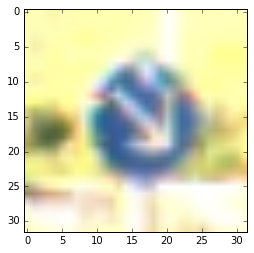

Class:  39


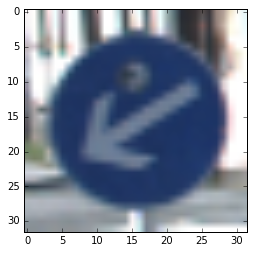

Class:  40


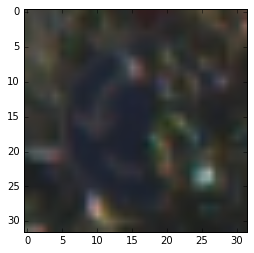

Class:  41


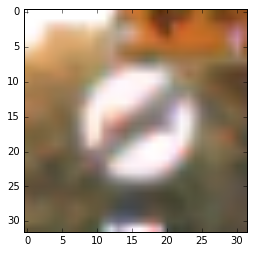

Class:  42


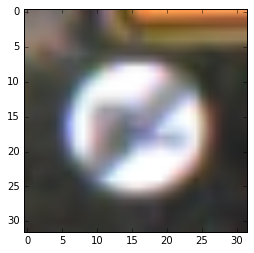

Data visualisation complete


In [2]:
Testpoint1_var = {}
Testpoint1_file = 'C:/nanodegree_datasets/data/Testpoint1'
Testpoint1_force = False

# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'C:/nanodegree_datasets/train.p'
testing_file = 'C:/nanodegree_datasets/test.p'

with open(training_file, mode='rb') as f:
    train_provided = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test_provided = pickle.load(f)
    
X_train_provided, y_train_provided = train_provided['features'], train_provided['labels']
X_test_provided, y_test_provided = test_provided['features'], test_provided['labels']


### Replace each question mark with the appropriate value.
import pickle

# TODO: Number of training examples
n_train_provided = len(X_train_provided)

# TODO: Number of testing examples.
n_test_provided = len(X_test_provided)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train_provided.shape[1:]

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(set(y_train_provided))

print("Number of training examples =", n_train_provided)
print("Number of testing examples =", n_test_provided)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

# Storing variables for Testpoint
Testpoint1_var['n_classes'] = n_classes


### Creating Label Dictionary
import csv

label_dict = None
with open('C:/nanodegree_datasets/Trafficsignnames.csv', mode='r') as infile:
    reader = csv.reader(infile)
    next(reader, None)
    label_dict = {int(rows[0]):rows[1] for rows in reader}

# Storing for Testpoint1
Testpoint1_var['label_dict'] = label_dict


### Data exploration visualization goes here

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Visualizing Data for Each Label
fig = plt.figure(figsize=(32,32), tight_layout={'h_pad':4})
for i in range(n_classes):
    k = np.where(y_train_provided==i)
    img = X_train_provided[k[0][0]]
    ax = fig.add_subplot(int(n_classes/4)+1,4,i+1) 
    ax.imshow(img, interpolation='none')
    ax.set_title(label_dict[y_train_provided[k[0][0]]])
plt.show()

  

### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import numpy as np
import scipy.ndimage

#train_features = np.array(train['features'])
#train_labels = np.array(train['labels'])

inputs_per_class = np.bincount(y_train_provided)
max_inputs = np.max(inputs_per_class)

mpl_fig = plt.figure()
ax = mpl_fig.add_subplot(111)
ax.set_ylabel('Inputs')
ax.set_xlabel('Class')
ax.set_title('Number of inputs per class')
ax.bar(range(len(inputs_per_class)), inputs_per_class, 1/3, color='blue', label='Inputs per class')
plt.show()

print("Details about each image")
for i in range(n_classes):
    for j in range(len(y_train_provided)):
        if (i == y_train_provided[j]):
            print('Class: ', i)
            plt.imshow(X_train_provided[j])
            plt.show()
            break

print('Data visualisation complete')

In [3]:
### Preprocess the data here.
import os
import warnings
from tqdm import tqdm
from skimage import exposure

### Histogram Equilization
def normalized_image(image_data):
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        return np.array([exposure.equalize_adapthist(image, clip_limit=0.03) for image in tqdm(image_data)])

if not os.path.isfile(Testpoint1_file) or Testpoint1_force:
    print('Normalizing Training Images...')
    X_train_provided_normalized = normalized_image(X_train_provided)
    
    print('\nNormalizing Test Images...')
    X_test_provided_normalized = normalized_image(X_test_provided)
    
    Testpoint1_var['X_train_provided_normalized'] = X_train_provided_normalized
    Testpoint1_var['y_train_provided'] = y_train_provided
    Testpoint1_var['X_test_provided_normalized'] = X_test_provided_normalized
    Testpoint1_var['y_test_provided'] = y_test_provided

else:
    print('Testpoint Already Exists. Data would be loaded from Testpoint. Set Testpoint1_force to force new file.')

Testpoint Already Exists. Data would be loaded from Testpoint. Set Testpoint1_force to force new file.


In [4]:

### Storing Varibales for Testpoint1
import pickle

if not os.path.isfile(Testpoint1_file) or Testpoint1_force:
    print('Caching variables in pickle file...')
    try:
        with open(Testpoint1_file, 'wb') as pfile:
            pickle.dump(Testpoint1_var, pfile, pickle.HIGHEST_PROTOCOL)
    except Exception as e:
        print('Unable to save data to', Testpoint1_file, ':', e)
        raise
    print('Data cached in pickle file.')
else:
    print('Pickle file already created. Set Testpoint1_force to force new file.')

Pickle file already created. Set Testpoint1_force to force new file.


In [5]:
import pickle 
Testpoint1_file = 'C:/nanodegree_datasets/data/Testpoint1'

with open(Testpoint1_file, 'rb') as pfile:
    pickle_data = pickle.load(pfile)
    for key in pickle_data:
        exec(key + "= pickle_data['" + str(key) + "']")
    del pickle_data
    
Testpoint2_var = {}
Testpoint2_file = 'C:/nanodegree_datasets/data/Testpoint2'
Testpoint2_force = False

In [6]:
from sklearn.model_selection import train_test_split

## Splitiing Training Data in Training, Validation, Test
X_train, X_val_test, y_train, y_val_test = train_test_split(
    X_train_provided_normalized,
    y_train_provided,
    test_size=0.30,
    random_state=9345,
    stratify=y_train_provided
)

X_val, X_test, y_val, y_test = train_test_split(
    X_val_test,
    y_val_test,
    test_size=0.30,
    random_state=9345,
    stratify=y_val_test
)

del X_val_test
del y_val_test

Testpoint2_var['X_train'] = X_train.astype('float32')
Testpoint2_var['y_train'] = y_train
Testpoint2_var['X_val'] = X_val.astype('float32')
Testpoint2_var['y_val'] = y_val
Testpoint2_var['X_test'] = X_test.astype('float32')
Testpoint2_var['y_test'] = y_test

In [ ]:
import keras
from keras.preprocessing.image import ImageDataGenerator

datagen = keras.preprocessing.image.ImageDataGenerator(
    rotation_range=8,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    fill_mode='nearest',
    horizontal_flip=False,
    vertical_flip=False
)

Using TensorFlow backend.


In [ ]:
import os
import numpy as np
from tqdm import tqdm
from sklearn.utils import shuffle

#total_image_per_class = 5000
Testpoint2_file = 'C:/nanodegree_datasets/data/Testpoint2'
Testpoint2_force = 'C:/nanodegree_datasets/data/Testpoint2'
Testpoint1_file = 'C:/nanodegree_datasets/data/Testpoint1'
total_image_per_class = 50
X_train_augmented = np.empty((0,32,32,3))
y_train_augmented = np.empty(0,dtype='uint8')


if not os.path.isfile(Testpoint2_file) or Testpoint2_force:
    print('Started Augmenting Image Data...')
    for i in tqdm(range(n_classes)):
        index = [y_train==i]
        images_for_i_class = X_train[y_train==i]
        y_i_class = y_train[y_train==i]
        
        X_train_augmented_i = np.copy(images_for_i_class)
        y_train_augmented_i = np.copy(y_i_class)
        
        for X,y in datagen.flow(images_for_i_class, y_i_class, batch_size=len(y_i_class), seed=9345+i*37):            
            X_train_augmented_i = np.append(X_train_augmented_i, X, axis=0)
            y_train_augmented_i = np.append(y_train_augmented_i, y, axis=0)
            
            if len(X_train_augmented_i) >= total_image_per_class:
                break

        X_train_augmented = np.append(X_train_augmented, X_train_augmented_i[:50], axis=0)
        y_train_augmented = np.append(y_train_augmented, y_train_augmented_i[:50], axis=0)              
else:
    print('Pickle file already created. Set Testpoint2_force to force new file.')

X_train_augmented, y_train_augmented = shuffle(X_train_augmented, y_train_augmented, random_state=9345)

# Storing for Testpoint2
X_train_augmented = X_train_augmented.astype('float32')
Testpoint2_var['X_train_augmented'] = X_train_augmented
Testpoint2_var['y_train_augmented'] = y_train_augmented

Testpoint2_var.keys()

### Storing Varibales for Testpoint2

import joblib
joblib.dump(Testpoint2_var, Testpoint2_file)

import pickle


## Testpoint1 Variables
Testpoint1_file = 'C:/nanodegree_datasets/data/Testpoint1'
with open(Testpoint1_file, 'rb') as pfile:
    pickle_data = pickle.load(pfile)
    for key in pickle_data:
        exec(key + "= pickle_data['" + str(key) + "']")
    del pickle_data

## Testpoint2 Variables
import joblib
Testpoint2_file = 'C:/nanodegree_datasets/data/Testpoint2'
pickle_data = joblib.load(Testpoint2_file)
for key in pickle_data:
    exec(key + "= pickle_data['" + str(key) + "']")
del pickle_data


import pickle


## Testpoint1 Variables
Testpoint1_file = 'C:/nanodegree_datasets/data/Testpoint1'
with open(Testpoint1_file, 'rb') as pfile:
    pickle_data = pickle.load(pfile)
    for key in pickle_data:
        exec(key + "= pickle_data['" + str(key) + "']")
    del pickle_data

## Testpoint2 Variables
import joblib
Testpoint2_file = 'C:/nanodegree_datasets/data/Testpoint2'
pickle_data = joblib.load(Testpoint2_file)
for key in pickle_data:
    exec(key + "= pickle_data['" + str(key) + "']")
del pickle_data


### Define your architecture here.
### Feel free to use as many code cells as needed.

import tensorflow as tf
from tensorflow.contrib.layers import flatten

from tensorflow.contrib.layers import flatten

def conv2d(x, W, b, strides, padding):
    x = tf.nn.conv2d(x, W, strides=[1, strides, strides, 1], padding=padding)
    x = tf.nn.bias_add(x, b)
    return tf.nn.relu(x)


def maxpool2d(x, k, padding):
    return tf.nn.max_pool(
        x,
        ksize=[1, k, k, 1],
        strides=[1, k, k, 1],
        padding=padding)


def LeNet(x):
    
    # Input = 32x32x3
    # Hyperparameters
    mu = 0
    sigma = 0.1
    
    #x_gray = tf.image.rgb_to_grayscale(x)
    
    ### Layer 1:
    # Convolutional. Output = 28x28x6
    # Pooling. Output = 14x14x6
    W1 = tf.Variable(tf.truncated_normal([5, 5, 3, 6], mean = mu, stddev = sigma), name='W1')
    b1 = tf.Variable(tf.zeros(6), name='b1')
    layer1 = conv2d(x, W1, b1, 1, 'VALID')
    pool1 = tf.nn.dropout(maxpool2d(layer1, 2, 'VALID'), keep_prob_conv)

    ### Layer 2:
    # Convolutional: Output = 10x10x16
    # Pooling. Output = 5x5x16
    W2 = tf.Variable(tf.truncated_normal([5, 5, 6, 16], mean = mu, stddev = sigma), name='W2')
    b2 = tf.Variable(tf.zeros(16), name='b2')
    layer2 = conv2d(pool1, W2, b2, 1, 'VALID')
    pool2 = tf.nn.dropout(maxpool2d(layer2, 2, 'VALID'), keep_prob_conv)
    
    ### Layer 3:
    # Fully Connected. Output = 120
    fc = flatten(pool2)
    W_fc1 = tf.Variable(tf.truncated_normal([400, 120], mean = mu, stddev = sigma), name='W_fc1')
    b_fc1 = tf.Variable(tf.zeros(120), name='b_fc1')
    fc1 = tf.nn.relu(tf.add(tf.matmul(fc, W_fc1), b_fc1))
    fc1_drop = tf.nn.dropout(fc1, keep_prob)

    ### Layer 4
    # Fully Connected. Output = 84
    W_fc2 = tf.Variable(tf.truncated_normal([120, 84], mean = mu, stddev = sigma), name='W_fc2')
    b_fc2 = tf.Variable(tf.zeros(84), name='b_fc2')
    fc2 = tf.nn.relu(tf.add(tf.matmul(fc1_drop, W_fc2), b_fc2))
    fc2_drop = tf.nn.dropout(fc2, keep_prob)
    

    ### Layer 5
    # Fully Connected. Output = n_classes
    W_fc3 = tf.Variable(tf.truncated_normal([84, 43], mean = mu, stddev = sigma), name='W_fc3')
    b_fc3 = tf.Variable(tf.zeros(43), name='b_fc3')
    logits = tf.add(tf.matmul(fc2_drop, W_fc3), b_fc3)
    
    return logits

x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
keep_prob_conv = tf.placeholder(tf.float32)
keep_prob = tf.placeholder(tf.float32)
one_hot_y = tf.one_hot(y, 43)

rate = 0.001
BATCH_SIZE = 128
EPOCHS = 3

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=one_hot_y)
#tf.nn.softmax_cross_entropy_with_logits(logits=prediction, labels=y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob:1, keep_prob_conv:1})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

### Train your model here.
### Feel free to use as many code cells as needed.
from sklearn.utils import shuffle
from tqdm import tqdm

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    #loader = tf.train.import_meta_graph('lenet_gray.meta')
    #loader.restore(sess, tf.train.latest_Testpoint('./'))
    
    num_examples = len(X_train_augmented)
    #num_examples = 10
    
    print(" Starts Training here..")
    print()
    for i in range(EPOCHS):
        print("EPOCH " + str(i+1))
        X_train, y_train = shuffle(X_train_augmented, y_train_augmented)
        for offset in tqdm(range(0, num_examples, BATCH_SIZE)):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob:1, keep_prob_conv:1})
            #break
         
        training_accuracy = evaluate(X_train_augmented, y_train_augmented)
        validation_accuracy = evaluate(X_val, y_val)
        print("Training Accuracy = {:.3f}".format(training_accuracy))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        #break
    
    import os
    try:
        saver
    except NameError:
        saver = tf.train.Saver()
    save_path='C:/nanodegree_datasets/model1/model'
    if not os.path.isabs(save_path):
        save_path = os.path.abspath(os.path.join(os.getcwd(), save_path))
    saver.save(sess, save_path)
    print("Model saved")
    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))
    
    
    
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    loader = tf.train.import_meta_graph('C:/nanodegree_datasets/model1/model.meta')
    loader.restore(sess, tf.train.latest_Testpoint('./C:/nanodegree_datasets/model1/'))

    test_accuracy = evaluate(X_test_provided_normalized, y_test_provided)
    print("Test Accuracy = {:.3f}".format(test_accuracy))
    
    
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

import os

fig = plt.figure(figsize=(32,32), tight_layout={'h_pad':4})
i = 0
for file in os.listdir('C:/nanodegree_datasets/data'):
    if '.jpg' in file:
        ax = fig.add_subplot(4,4,i+1) 
        img = mpimg.imread('C:/nanodegree_datasets/data/' + file)
        ax.imshow(img)
        i+=1
plt.show()

Started Augmenting Image Data...


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 43/43 [00:26<00:00,  2.04it/s]


 Starts Training here..

EPOCH 1


  0%|                                                                                                                                                                                                                                                  | 0/17 [00:00<?, ?it/s]

In [ ]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.  

import os, sys
import numpy as np
from PIL import Image
import warnings
from skimage import exposure
import pandas as pd
import tensorflow as tf

### Histogram Equilization
def normalized_image(image_data):
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        return np.array([exposure.equalize_adapthist(image, clip_limit=0.03) for image in image_data])

size = 32, 32
softmax_prob = None

with tf.Session() as sess:
    loader = tf.train.import_meta_graph('C:/nanodegree_datasets/model1/model.meta')
    loader.restore(sess, tf.train.latest_checkpoint('C:/nanodegree_datasets/model1/'))
    sess = tf.get_default_session()
    
    i = 0
    for file in os.listdir('data'):
        if '.jpg' in file:
            im = Image.open('C:/nanodegree_datasets/data/' + file)
            im.thumbnail(size, Image.ANTIALIAS)
            im_normalized = normalized_image(np.array([np.array(im)]))
            softmax_prob = sess.run(tf.nn.softmax(logits), feed_dict={x:im_normalized, keep_prob:1.0, keep_prob_conv:1})
            fig = plt.figure(figsize=(15,2))
            ax = fig.add_subplot(1,2,1) 
            img = mpimg.imread('C:/nanodegree_datasets/data/' + file)
            ax.imshow(img)
            
            ax = fig.add_subplot(1,2,2) 
            ax.set_xticks(np.arange(0,43,1))
            plt.plot(softmax_prob[0])
            for tick in ax.xaxis.get_major_ticks():
                tick.label.set_fontsize('x-small') 
                tick.label.set_rotation('vertical')
            plt.grid()
            plt.show()